# Customer Segmentation 

<a href='https://drive.google.com/file/d/1svnXrwmzLbqebqtDgdKhLLhUny7-eyqp/view?usp=drive_link' >Data dosyasına buradan erişebilirsiniz</a>

In [1]:
import pandas as pd
import sqlite3

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option("display.max_columns",100) #Satır ve sütunların hepsini göstermeye yarıyor
pd.set_option("display.max_rows",190) #isnull gibi degerlerin tamamını görmeye yarıyor

In [2]:
#pip install yellowbrick

In [3]:
from yellowbrick.cluster import KElbowVisualizer

In [4]:
df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

C:\Users\erkan\AppData\Local\Temp\ipykernel_4048\500614148.py:1: DtypeWarning: Columns (20,33,73,106,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")


In [5]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,...,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Basic-Rollators-For-Adults-With-Seat-Green-6-W...,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E0149 +E0156,1.0,NaN,0.0,NaN,136.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,24.80,7.50,30.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,...,NaN,NaN,NaN,NaN,Urinary-Drain-Bags0000,0.0,EA,1 Each / Each,NaN,1 EA,NaN,NaN,NaN,Rx,Yes,NaN,NaN,NaN,https://medline360.medline.com:443/irj/servlet...,508f2d75-582e-2e10-2eab-d83980a9b1d0,A4357,1.0,NaN,0.0,OFF sale cause it is an RX item,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,8.00,7.00,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,...,NaN,NaN,NaN,NaN,SensiCare-Nitrile-Exam-GlovesBlueXX-Large,0.0,CS,800 Each / Case,NaN,1 CS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO GOVERNMENT OR SUPPLIER HCPCS CODE VERIFICATION,800.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.23,10.04,10.24,NaN,NaN,NaN,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,...,NaN,NaN,NaN,NaN,Basket-for-2-Butt

In [6]:
df.shape

(4194, 181)

In [7]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [8]:
print(df.dtypes)

Customers.id               int64
Customers.fname           object
Customers.lname           object
Customers.company         object
Customers.create_date      int64
                          ...   
Products.leg_style       float64
Products.seat_size        object
Products.family_id        object
Products.saved_status    float64
Products.freight_cost    float64
Length: 181, dtype: object


In [9]:
df.describe()

,Customers.id,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.reorder_id,Orders.external_id,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_amount,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.purchase_order,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,...,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.vendor,Products.import_id,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.amazon_type,Products.amazon_price,Products.google_adwords,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.websites,Products.audio,Products.seo_footer,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.markup,Products.override_markup,Products.import_flags,Products.map_price,Products.hygienic,Products.default_quantity,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.google_shopping_label,Products.leg_style,Products.saved_status,Products.freight_cost
count,4194.000000,4.194000e+03,101.0,2114.000000,0.0,5.000000,3.000000,0.0,0.0,0.0,4.194000e+03,3771.000000,4194.000000,4194.000000,82.000000,5.000000e+00,0.0,4194.000000,3737.000000,3999.000000,882.000000,882.000000,0.0,0.0,278.000000,364.000000,4194.000000,351.000000,0.0,0.0,3.000000,4189.000000,4.176000e+03,4176.000000,0.0,0.0,4194.000000,4.194000e+03,4.171000e+03,3.848000e+03,0.0,0.0,0.0,0.0,1.0,96.000000,4011.000000,4194.000000,4194.000000,4151.000000,...,0.0,1008.000000,4037.000000,4037.000000,0.0,4037.000000,4037.000000,0.0,4017.000000,4036.000000,1160.000000,4037.000000,2987.000000,1239.000000,0.0,4.037000e+03,2959.000000,3.130000e+03,3917.000000,0.0,592.000000,0.0,2334.0,2334.0,3.728000e+03,0.0,0.0,0.0,0.0,0.0,2837.0,998.000000,996.000000,996.000000,2.127000e+03,2638.000000,0.0,2920.000000,2786.000000,122.000000,2080.000000,0.0,3998.000000,3998.000000,3998.000000,659.000000,387.000000,0.0,3930.000000,0.0
mean,1796.518121,1.440971e+09,0.0,0.979659,NaN,0.200000,7.333333,NaN,NaN,NaN,1.450401e+09,0.137364,9142.984025,1796.518121,7389.158537,6.018061e+08,NaN,131.925196,0.800838,7.141263,20.403628,9.972676,NaN,NaN,14.752590,13.086676,137.192818,47.981396,NaN,NaN,18.000000,2.958940,1.443104e+09,134.842263,NaN,NaN,1.326180,1.443054e+09,1.449607e+09,1.442167e+09,NaN,NaN,NaN,NaN,1.0,0.010417,0.124159,11156.068670,9142.984025,4451.426162,...,NaN,1.916667,4518.398068,0.987119,NaN,1.629676,3.400297,NaN,121.683321,74.266043,70.754095,52.318192,9549.464680,5.811138,NaN,1.462428e+09,0.940858,2.865179e+13,61.543528,NaN,89.727855,NaN,199.0,22005.0,1.450329e+09,NaN,NaN,NaN,NaN,NaN,0.0,21.292014,19.191185,13.587992,5.504591e+11,162.885140,NaN,0.166438,65.059943,181.696967,0.064423,NaN,17.208216,10.872750,11.592447,15.487041,3.863049,NaN,0.876336,NaN
std,1065.679090,1.887681e+07,0.0,0.141196,NaN,0.447214,0.577350,NaN,NaN,NaN,1.021334e+07,0.391842,5276.541078,1065.679090,3818.085460,1.342831e+09,NaN,231.156869,4.859280,4.531500,11.850291,14.617203,NaN,NaN,32.755244,51.296654,222.898475,209.843126,NaN,NaN,6.928203,0.312482,1.809258e+0

In [10]:
# Müşteri, Ürün ve Sipariş olarak üç farklı dataframe oluşturuyoruz

In [11]:
customer_cols = [col for col in df.columns if 'Customers' in col]
customer = df[customer_cols]

In [12]:
product_cols = [col for col in df.columns if 'Products' in col]
product = df[product_cols]

In [13]:
order_cols = [col for col in df.columns if 'Orders' in col]
order = df[order_cols]

In [14]:
order.head()

,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type
0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.0,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,23,3,John,Smith,Company1,23,NaN,NaN,NaN,USD,NaN,20.00,NaN,9.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.99,NaN,fedex,11|Ground,NaN,NaN,NaN,1.28597E+14,3.0,1.386090e+09,NaN,authorize.net,NaN,29.99,NaN,0,0,NaN,1,1386090455,1.440529e+09,1.386103e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,9531,3,John,Smith,Company1,9531,NaN,NaN,NaN,USD,NaN,68.78,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.73,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.449604e+09,genlee166,authorize.net,NaN,78.73,NaN,0,0,NaN,3,1449603652,1.450213e+09,NaN,test order,Test,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,29,4,James,Anderson,NaN,29,NaN,Ebay,NaN,USD,NaN,19.56,0.0,9.95,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,29.55,NaN,NaN,11|Ground,NaN,NaN,NaN,7.96468E+14,3.0,1.386780e+09,NaN,NaN,Credit Card,29.55,NaN,NaN,NaN,NaN,1,1386780263,1.440529e+09,1.386800e+09,ebay order\rpaid by pay pal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,30,5,Abraham,Pollak,Company3,30,NaN,NaN,NaN,USD,NaN,36.05,NaN,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.00,NaN,fedex,11|Ground,NaN,NaN,NaN,6.87398E+14,3.0,1.386862e+09,NaN,NaN,Credit Card,46.00,NaN,NaN,NaN,NaN,1,1386861599,1.440529e+09,1.386876e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
# SQLite veritabanına bağlanma
conn = sqlite3.connect('database.db')

In [16]:
# DataFrame'i SQLite tablosuna ekle
customer.to_sql('cst', conn, if_exists='replace', index=False)
product.to_sql('prd', conn, if_exists='replace', index=False)
order.to_sql('ord', conn, if_exists='replace', index=False)

4194

In [17]:
conn.close()

In [18]:
# Veritabanına yeniden bağlanın
conn = sqlite3.connect('database.db')

# Tabloları Pandas DataFrame'lerine okuyun
customers = pd.read_sql_query("SELECT * FROM cst", conn)
orders = pd.read_sql_query("SELECT * FROM ord", conn)
products = pd.read_sql_query("SELECT * FROM prd", conn)


In [19]:
customer.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764354,0.0
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437762646,0.0
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1437764316,0.0


In [20]:
customers.shape

(4194, 15)

In [21]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Customers.id             4194 non-null   int64  
 1   Customers.fname          4194 non-null   object 
 2   Customers.lname          4194 non-null   object 
 3   Customers.company        727 non-null    object 
 4   Customers.create_date    4194 non-null   int64  
 5   Customers.status         101 non-null    float64
 6   Customers.mailing        2114 non-null   float64
 7   Customers.reminders      0 non-null      object 
 8   Customers.tax_exempt     5 non-null      float64
 9   Customers.account_id     3 non-null      float64
 10  Customers.sales_rep      0 non-null      object 
 11  Customers.rewards        0 non-null      object 
 12  Customers.profile_id     0 non-null      object 
 13  Customers.last_modified  4194 non-null   int64  
 14  Customers.customer_type 

In [22]:
customers.isnull().sum()

Customers.id                  0
Customers.fname               0
Customers.lname               0
Customers.company          3467
Customers.create_date         0
Customers.status           4093
Customers.mailing          2080
Customers.reminders        4194
Customers.tax_exempt       4189
Customers.account_id       4191
Customers.sales_rep        4194
Customers.rewards          4194
Customers.profile_id       4194
Customers.last_modified       0
Customers.customer_type     423
dtype: int64

In [23]:
customers["Customers.status"].value_counts()

Customers.status
0.0    101
Name: count, dtype: int64

In [24]:
customers["Customers.mailing"].value_counts()

Customers.mailing
1.0    2071
0.0      43
Name: count, dtype: int64

In [25]:
customers["Customers.company"].value_counts()

Customers.company
Company145    27
Company130    17
Company59     15
Company52     13
Company171    12
              ..
Company163     1
Company162     1
Company160     1
Company157     1
Company425     1
Name: count, Length: 425, dtype: int64

In [26]:
customers["Customers.customer_type"].value_counts()

Customers.customer_type
0.0    3319
1.0     386
2.0      66
Name: count, dtype: int64

In [27]:
# Boş satır sayısını hesaplama
null_counts = orders.isnull().sum()

# 3000'den fazla boş satırı olan sütunları belirleme
cols_to_drop = null_counts[null_counts > 3500].index

# Belirlenen sütunları DataFrame'den silme
orders = orders.drop(cols_to_drop, axis=1)

In [28]:
orders.isnull().sum()

Orders.id                     0
Orders.customer_id            0
Orders.fname                  0
Orders.lname                  0
Orders.company             3466
Orders.order_number           0
Orders.currency               0
Orders.subtotal               0
Orders.tax                  457
Orders.shipping             195
Orders.coupon_id           3312
Orders.coupon_amount       3312
Orders.total                  0
Orders.shipping_carrier     617
Orders.shipping_method      443
Orders.tracking             376
Orders.payment_status         5
Orders.payment_date          18
Orders.payment_user        2814
Orders.payment_type         384
Orders.payment_method      3472
Orders.payment_amount        18
Orders.payment_id           430
Orders.payment_code         748
Orders.status                 0
Orders.placed_date            0
Orders.updated_date          23
Orders.shipped_date         346
Orders.notes               2918
Orders.customer_type        183
dtype: int64

In [29]:
orders=orders.drop(["Orders.company","Orders.shipping_carrier","Orders.shipping_method","Orders.tracking","Orders.payment_user",
                   "Orders.payment_type","Orders.payment_method","Orders.payment_id","Orders.payment_code","Orders.notes" ],axis=1)

In [30]:
orders["Orders.tax"]=orders["Orders.tax"].fillna(orders["Orders.tax"].mean())

In [31]:
orders["Orders.shipping"]=orders["Orders.shipping"].fillna(orders["Orders.shipping"].mean())

In [32]:
orders["Orders.coupon_id"]=orders["Orders.coupon_id"].fillna(orders["Orders.coupon_id"].mean())

In [33]:
orders["Orders.coupon_amount"]=orders["Orders.coupon_amount"].fillna(orders["Orders.coupon_amount"].mean())

In [34]:
orders["Orders.payment_status"]=orders["Orders.payment_status"].fillna(orders["Orders.payment_status"].mean())

In [35]:
orders["Orders.payment_date"]=orders["Orders.payment_date"].fillna(orders["Orders.payment_date"].mean())

In [36]:
orders["Orders.payment_amount"]=orders["Orders.payment_amount"].fillna(orders["Orders.payment_amount"].mean())

In [37]:
orders["Orders.updated_date"]=orders["Orders.updated_date"].fillna(orders["Orders.updated_date"].mean())

In [38]:
orders["Orders.shipped_date"]=orders["Orders.shipped_date"].fillna(orders["Orders.shipped_date"].mean())

In [39]:
orders["Orders.customer_type"]=orders["Orders.customer_type"].fillna(orders["Orders.customer_type"].mean())

In [40]:
# Boş satır sayısını hesaplama
null_counts = customers.isnull().sum()

# 3000'den fazla boş satırı olan sütunları belirleme
cols_to_drop = null_counts[null_counts > 3500].index

# Belirlenen sütunları DataFrame'den silme
customers = customers.drop(cols_to_drop, axis=1)

In [41]:
customers.isnull().sum()

Customers.id                  0
Customers.fname               0
Customers.lname               0
Customers.company          3467
Customers.create_date         0
Customers.mailing          2080
Customers.last_modified       0
Customers.customer_type     423
dtype: int64

In [42]:
customers["Customers.mailing"]=customers["Customers.mailing"].fillna(customers["Customers.mailing"].mean())

In [43]:
customers["Customers.customer_type"]=customers["Customers.customer_type"].fillna(customers["Customers.customer_type"].mean())

In [44]:
customers=customers.drop("Customers.company",axis=1)

In [45]:
# Boş satır sayısını hesaplama
null_counts = products.isnull().sum()

# 3000'den fazla boş satırı olan sütunları belirleme
cols_to_drop = null_counts[null_counts > 3500].index

# Belirlenen sütunları DataFrame'den silme
products = products.drop(cols_to_drop, axis=1)

In [46]:
products.isnull().sum()

Products.id                157
Products.status            157
Products.template          221
Products.vendor            157
Products.import_id         157
                          ... 
Products.handling_time    3196
Products.size             2751
Products.material         3392
Products.family_id         325
Products.saved_status      264
Length: 61, dtype: int64

In [47]:
products.shape

(4194, 61)

In [48]:
object_cols = products.dtypes[products.dtypes == 'object'].index

In [49]:
products=products.drop(object_cols,axis=1)

In [50]:
kc = pd.DataFrame(index=range(60), columns=['A', 'B', 'C'])

In [51]:
products = products.fillna(products.mean())

In [52]:
dff = pd.concat([ products])
dff = dff.loc[~dff.index.duplicated(keep='first')]

In [53]:
dff.isnull().sum()

Products.id                  0
Products.status              0
Products.vendor              0
Products.import_id           0
Products.list_price          0
Products.price               0
Products.sale_price          0
Products.cost                0
Products.flags               0
Products.left_flag           0
Products.last_modified       0
Products.taxable             0
Products.shopping_gtin       0
Products.shopping_flags      0
Products.shopping_cat        0
Products.shopzilla_cat       0
Products.qb_edit_sequence    0
Products.seo_category        0
Products.length              0
Products.width               0
Products.height              0
Products.upc                 0
Products.case_qty            0
Products.override_markup     0
Products.import_flags        0
Products.hygienic            0
Products.shipping_length     0
Products.shipping_width      0
Products.shipping_height     0
Products.saved_status        0
dtype: int64

In [54]:
ord=orders.columns

In [55]:
ord

Index(['Orders.id', 'Orders.customer_id', 'Orders.fname', 'Orders.lname',
       'Orders.order_number', 'Orders.currency', 'Orders.subtotal',
       'Orders.tax', 'Orders.shipping', 'Orders.coupon_id',
       'Orders.coupon_amount', 'Orders.total', 'Orders.payment_status',
       'Orders.payment_date', 'Orders.payment_amount', 'Orders.status',
       'Orders.placed_date', 'Orders.updated_date', 'Orders.shipped_date',
       'Orders.customer_type'],
      dtype='object')

In [56]:
dff[ord]=orders

In [57]:
dff

,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.total,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type
0,2310.0,0.0,1.0,3.0,80.70,57.64,70.754095,44.00,0.0,5.811138,1.463163e+09,1.0,1.088440e+13,62.0,199.0,22005.0,1.450325e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.00000,0.0,136.000000,0.000000,24.80,7.50,30.40,0.000000,3758,797,Christy,Dill,3758,USD,57.20,0.000000,9.950000,13.000000,2.860000,64.29,3.0,1.426019e+09,64.29,1,1426019099,1.438868e+09,1.426101e+09,0.000000
1,177.0,1.0,1.0,3.0,14.41,10.29,5.000000,1.87,65.0,5.811138,1.462370e+09,1.0,1.008020e+13,62.0,199.0,22005.0,1.450322e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.00000,0.0,0.000000,0.000000,8.00,7.00,1.50,0.876336,23,3,John,Smith,23,USD,20.00,0.800838,9.990000,20.403628,9.972676,29.99,3.0,1.386090e+09,29.99,1,1386090455,1.440529e+09,1.386103e+09,0.000000
2,1.0,0.0,1.0,3.0,96.29,68.78,70.754095,52.50,32896.0,5.811138,1.463163e+09,1.0,4.008020e+13,62.0,199.0,22005.0,1.450321e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,800.00000,0.0,65.059943,0.064423,13.23,10.04,10.24,0.000000,9531,3,John,Smith,9531,USD,68.78,0.000000,9.950000,20.403628,9.972676,78.73,3.0,1.449604e+09,78.73,3,1449603652,1.450213e+09,1.442167e+09,0.000000
3,983.0,0.0,1.0,3.0,27.38,19.56,70.754095,12.62,0.0,5.811138,1.462595e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450323e+09,0.0,21.292014,19.191185,13.587992,8.019675e+10,1.00000,0.0,65.059943,0.064423,10.60,7.80,18.50,0.876336,29,4,James,Anderson,29,USD,19.56,0.000000,9.950000,20.403628,9.972676,29.55,3.0,1.386780e+09,29.55,1,1386780263,1.440529e+09,1.386800e+09,0.000000
4,991.0,1.0,1.0,3.0,50.47,36.05,70.754095,25.75,0.0,5.811138,1.462370e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450323e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.00000,0.0,65.059943,0.064423,8.50,2.75,12.00,0.876336,30,5,Abraham,Pollak,30,USD,36.05,0.800838,9.950000,20.403628,9.972676,46.00,3.0,1.386862e+09,46.00,1,1386861599,1.440529e+09,1.386876e+09,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1842.0,3.0,1.0,3.0,33.11,23.65,14.850000,15.50,32896.0,6.000000,1.462370e+09,1.0,8.843890e+11,62.0,199.0,22005.0,1.450324e+09,0.0,21.292014,19.191185,13.587992,8.843890e+11,24.00000,1.0,418.000000,0.000000,5.00,5.00,7.00,3.000000,17421,3730,Nora,Fontana,17421,USD,14.85,1.210000,0.000000,20.403628,9.972676,16.06,3.0,1.463409e+09,16.06,0,1463408854,1.449607e+09,1.442167e+09,0.000000
4190,782.0,3.0,1.0,3.0,55.19,69.99,39.990000,28.16,0.0,6.000000,1.462574e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450322e+09,0.0,21.292014,19.191185,13.587992,8.843890e+11,1.00000,0.0,128.000000,0.000000,14.60,4.10,18.00,3.000000,17425,3732,Kennithe,Tecora,17425,USD,39.99,0.000000,7.141263,20.403628,9.972676,39.99,1.0,1.463413e+09,39.99,0,1463412757,1.449607e+09,1.442167e+09,0.124159
4191,2707.0,3.0,2.0,1.0,2107.50,1099.00,70.754095,675.00,0.0,5.811138,1.463420e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450467e+09,0.0,42.000000,20.000000,35.000000,8.223830e+11,162.88514,0.0,128.000000,0.000000,45.00

In [58]:
cst=customers.columns

In [59]:
cst

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.create_date', 'Customers.mailing', 'Customers.last_modified',
       'Customers.customer_type'],
      dtype='object')

In [60]:
dff[cst]=customers

In [61]:
dff

,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.total,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type
0,2310.0,0.0,1.0,3.0,80.70,57.64,70.754095,44.00,0.0,5.811138,1.463163e+09,1.0,1.088440e+13,62.0,199.0,22005.0,1.450325e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.00000,0.0,136.000000,0.000000,24.80,7.50,30.40,0.000000,3758,797,Christy,Dill,3758,USD,57.20,0.000000,9.950000,13.000000,2.860000,64.29,3.0,1.426019e+09,64.29,1,1426019099,1.438868e+09,1.426101e+09,0.000000,797,Christy,Dill,1426018724,0.979659,1437764306,0.000000
1,177.0,1.0,1.0,3.0,14.41,10.29,5.000000,1.87,65.0,5.811138,1.462370e+09,1.0,1.008020e+13,62.0,199.0,22005.0,1.450322e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.00000,0.0,0.000000,0.000000,8.00,7.00,1.50,0.876336,23,3,John,Smith,23,USD,20.00,0.800838,9.990000,20.403628,9.972676,29.99,3.0,1.386090e+09,29.99,1,1386090455,1.440529e+09,1.386103e+09,0.000000,3,John,Smith,1386089139,0.979659,1437764354,0.000000
2,1.0,0.0,1.0,3.0,96.29,68.78,70.754095,52.50,32896.0,5.811138,1.463163e+09,1.0,4.008020e+13,62.0,199.0,22005.0,1.450321e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,800.00000,0.0,65.059943,0.064423,13.23,10.04,10.24,0.000000,9531,3,John,Smith,9531,USD,68.78,0.000000,9.950000,20.403628,9.972676,78.73,3.0,1.449604e+09,78.73,3,1449603652,1.450213e+09,1.442167e+09,0.000000,3,John,Smith,1386089139,0.979659,1437764354,0.000000
3,983.0,0.0,1.0,3.0,27.38,19.56,70.754095,12.62,0.0,5.811138,1.462595e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450323e+09,0.0,21.292014,19.191185,13.587992,8.019675e+10,1.00000,0.0,65.059943,0.064423,10.60,7.80,18.50,0.876336,29,4,James,Anderson,29,USD,19.56,0.000000,9.950000,20.403628,9.972676,29.55,3.0,1.386780e+09,29.55,1,1386780263,1.440529e+09,1.386800e+09,0.000000,4,James,Anderson,1386780263,0.979659,1437762646,0.000000
4,991.0,1.0,1.0,3.0,50.47,36.05,70.754095,25.75,0.0,5.811138,1.462370e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450323e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.00000,0.0,65.059943,0.064423,8.50,2.75,12.00,0.876336,30,5,Abraham,Pollak,30,USD,36.05,0.800838,9.950000,20.403628,9.972676,46.00,3.0,1.386862e+09,46.00,1,1386861599,1.440529e+09,1.386876e+09,0.000000,5,Abraham,Pollak,1386861599,0.000000,1437764316,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1842.0,3.0,1.0,3.0,33.11,23.65,14.850000,15.50,32896.0,6.000000,1.462370e+09,1.0,8.843890e+11,62.0,199.0,22005.0,1.450324e+09,0.0,21.292014,19.191185,13.587992,8.843890e+11,24.00000,1.0,418.000000,0.000000,5.00,5.00,7.00,3.000000,17421,3730,Nora,Fontana,17421,USD,14.85,1.210000,0.000000,20.403628,9.972676,16.06,3.0,1.463409e+09,16.06,0,1463408854,1.449607e+09,1.442167e+09,0.000000,3730,Nora,Fontana,1463408698,1.000000,1463408698,0.000000
4190,782.0,3.0,1.0,3.0,55.19,69.99,39.990000,28.16,0.0,6.000000,1.462574e+09,1.0,2.865179e+13,62.0,199.0,22005

In [62]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4194 entries, 0 to 4193
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Products.id                4194 non-null   float64
 1   Products.status            4194 non-null   float64
 2   Products.vendor            4194 non-null   float64
 3   Products.import_id         4194 non-null   float64
 4   Products.list_price        4194 non-null   float64
 5   Products.price             4194 non-null   float64
 6   Products.sale_price        4194 non-null   float64
 7   Products.cost              4194 non-null   float64
 8   Products.flags             4194 non-null   float64
 9   Products.left_flag         4194 non-null   float64
 10  Products.last_modified     4194 non-null   float64
 11  Products.taxable           4194 non-null   float64
 12  Products.shopping_gtin     4194 non-null   float64
 13  Products.shopping_flags    4194 non-null   float64
 1

In [63]:
dff=dff.drop(["Customers.lname","Customers.fname","Orders.currency","Orders.order_number","Orders.lname","Orders.fname"],axis=1)

In [64]:
from yellowbrick.cluster import KElbowVisualizer

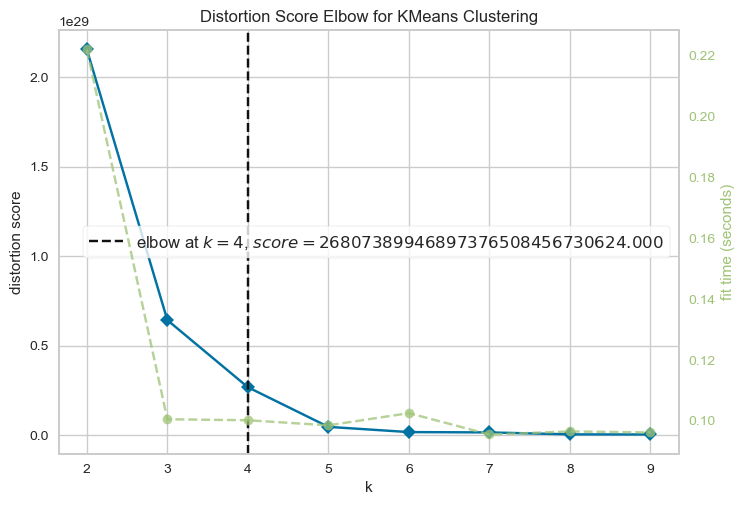

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(dff)
vis.show()

In [66]:
model=KMeans(5)

In [67]:
model=model.fit(dff)

In [68]:
tahmin=model.predict(dff)

In [69]:
tahmin

array([4, 4, 0, ..., 2, 4, 2])

In [70]:
silhouette_score(dff,tahmin)

0.9292861204698925

In [71]:
dff

,Products.id,Products.status,Products.vendor,Products.import_id,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_flags,Products.shopping_cat,Products.shopzilla_cat,Products.qb_edit_sequence,Products.seo_category,Products.length,Products.width,Products.height,Products.upc,Products.case_qty,Products.override_markup,Products.import_flags,Products.hygienic,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.saved_status,Orders.id,Orders.customer_id,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.total,Orders.payment_status,Orders.payment_date,Orders.payment_amount,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Customers.id,Customers.create_date,Customers.mailing,Customers.last_modified,Customers.customer_type
0,2310.0,0.0,1.0,3.0,80.70,57.64,70.754095,44.00,0.0,5.811138,1.463163e+09,1.0,1.088440e+13,62.0,199.0,22005.0,1.450325e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.00000,0.0,136.000000,0.000000,24.80,7.50,30.40,0.000000,3758,797,57.20,0.000000,9.950000,13.000000,2.860000,64.29,3.0,1.426019e+09,64.29,1,1426019099,1.438868e+09,1.426101e+09,0.000000,797,1426018724,0.979659,1437764306,0.000000
1,177.0,1.0,1.0,3.0,14.41,10.29,5.000000,1.87,65.0,5.811138,1.462370e+09,1.0,1.008020e+13,62.0,199.0,22005.0,1.450322e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.00000,0.0,0.000000,0.000000,8.00,7.00,1.50,0.876336,23,3,20.00,0.800838,9.990000,20.403628,9.972676,29.99,3.0,1.386090e+09,29.99,1,1386090455,1.440529e+09,1.386103e+09,0.000000,3,1386089139,0.979659,1437764354,0.000000
2,1.0,0.0,1.0,3.0,96.29,68.78,70.754095,52.50,32896.0,5.811138,1.463163e+09,1.0,4.008020e+13,62.0,199.0,22005.0,1.450321e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,800.00000,0.0,65.059943,0.064423,13.23,10.04,10.24,0.000000,9531,3,68.78,0.000000,9.950000,20.403628,9.972676,78.73,3.0,1.449604e+09,78.73,3,1449603652,1.450213e+09,1.442167e+09,0.000000,3,1386089139,0.979659,1437764354,0.000000
3,983.0,0.0,1.0,3.0,27.38,19.56,70.754095,12.62,0.0,5.811138,1.462595e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450323e+09,0.0,21.292014,19.191185,13.587992,8.019675e+10,1.00000,0.0,65.059943,0.064423,10.60,7.80,18.50,0.876336,29,4,19.56,0.000000,9.950000,20.403628,9.972676,29.55,3.0,1.386780e+09,29.55,1,1386780263,1.440529e+09,1.386800e+09,0.000000,4,1386780263,0.979659,1437762646,0.000000
4,991.0,1.0,1.0,3.0,50.47,36.05,70.754095,25.75,0.0,5.811138,1.462370e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450323e+09,0.0,21.292014,19.191185,13.587992,5.504591e+11,1.00000,0.0,65.059943,0.064423,8.50,2.75,12.00,0.876336,30,5,36.05,0.800838,9.950000,20.403628,9.972676,46.00,3.0,1.386862e+09,46.00,1,1386861599,1.440529e+09,1.386876e+09,0.000000,5,1386861599,0.000000,1437764316,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4189,1842.0,3.0,1.0,3.0,33.11,23.65,14.850000,15.50,32896.0,6.000000,1.462370e+09,1.0,8.843890e+11,62.0,199.0,22005.0,1.450324e+09,0.0,21.292014,19.191185,13.587992,8.843890e+11,24.00000,1.0,418.000000,0.000000,5.00,5.00,7.00,3.000000,17421,3730,14.85,1.210000,0.000000,20.403628,9.972676,16.06,3.0,1.463409e+09,16.06,0,1463408854,1.449607e+09,1.442167e+09,0.000000,3730,1463408698,1.000000,1463408698,0.000000
4190,782.0,3.0,1.0,3.0,55.19,69.99,39.990000,28.16,0.0,6.000000,1.462574e+09,1.0,2.865179e+13,62.0,199.0,22005.0,1.450322e+09,0.0,21.292014,19.191185,13.587992,8.843890e+11,1.00000,0.0,128.000000,0.000000,14.60,4.10,18.00,3.000000,17425,3732,39.99,0.000000,7.141263,20.403628,9.972676,39.99,1.0,1.463413e+09,39.99,0,1463412757,1.449607e+09,1.442167e+09,0.124159,3732,1463412756,0.979659,1463412756,0.137364
4191,2707.0,3.0,2.0,1.0,21

In [80]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4194 entries, 0 to 4193
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Products.id                4194 non-null   float64       
 1   Products.status            4194 non-null   float64       
 2   Products.vendor            4194 non-null   float64       
 3   Products.import_id         4194 non-null   float64       
 4   Products.list_price        4194 non-null   float64       
 5   Products.price             4194 non-null   float64       
 6   Products.sale_price        4194 non-null   float64       
 7   Products.cost              4194 non-null   float64       
 8   Products.flags             4194 non-null   float64       
 9   Products.left_flag         4194 non-null   float64       
 10  Products.last_modified     4194 non-null   float64       
 11  Products.taxable           4194 non-null   float64       
 12  Products.sh

In [79]:
dff['Orders.payment_date'] = pd.to_datetime(dff['Orders.payment_date'])

In [82]:
df['Recency'] = (datetime.now() - pd.to_datetime(df['Orders.payment_date'])).dt.days

In [85]:
df['Frequency'] = df.groupby('Customers.id')['Orders.payment_date'].transform('count')

In [86]:
df['Monetary'] = df.groupby('Customers.id')['Orders.total'].transform('sum')

In [88]:
rfm = df.groupby('Customers.id').agg({
    'Recency': 'min',
    'Frequency': 'max', 
    'Monetary': 'max'
})

In [94]:
rfm= pd.DataFrame({
'Recency':df['Recency'],
'Frequency': df['Frequency'] ,
'Monetary': df['Monetary']
})

In [96]:
rfm

,Recency,Frequency,Monetary
0,19935.0,1,64.29
1,19935.0,2,108.72
2,19935.0,2,108.72
3,19935.0,1,29.55
4,19935.0,2,124.99
...,...,...,...
4189,19935.0,1,16.06
4190,19935.0,1,39.99
4191,19935.0,1,989.10
4192,19935.0,1,129.99
